In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Load the dataset
df_salary = pd.read_csv('./datasets/salary_dataset.csv')

In [12]:
df_salary.head(10)

,months_of_service,seniority,salary_in_brl
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [13]:
# Clone DF to DF EDA and DF Bucketing
df_salary_eda = df_salary.copy()
df_salary_bucketing = df_salary.copy()

### EDA

In [14]:
# Check missing values
df_salary_eda.isnull().sum()

months_of_service    0
seniority            0
salary_in_brl        0
dtype: int64

In [15]:
# Extract statistical information
df_salary_eda.describe()

,months_of_service,seniority,salary_in_brl
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


<Axes: xlabel='months_of_service'>

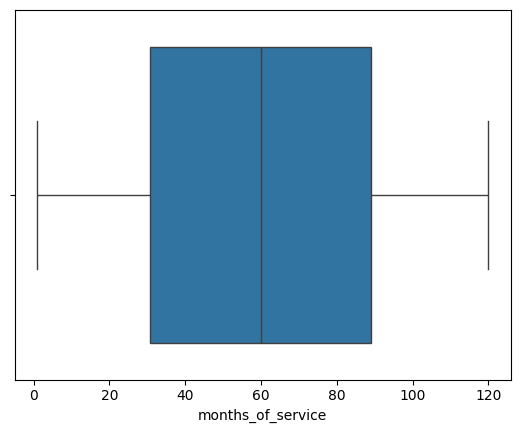

In [16]:
# Check outliers
sns.boxplot(data=df_salary_eda, x='months_of_service')

<Axes: xlabel='seniority'>

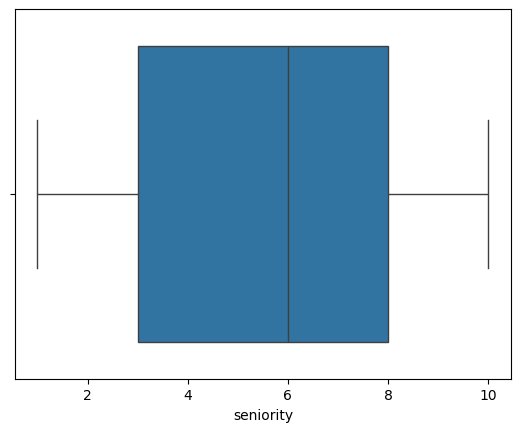

In [17]:
sns.boxplot(data=df_salary_eda, x='seniority')

<Axes: xlabel='salary_in_brl'>

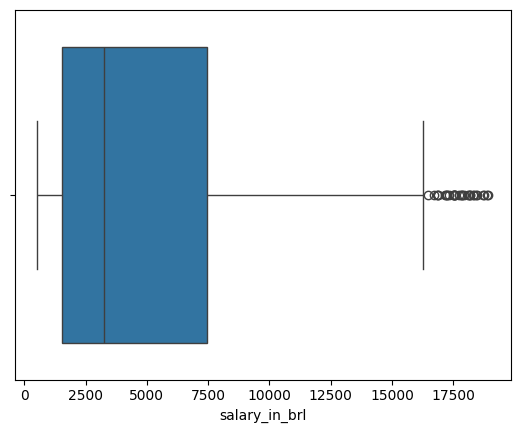

In [18]:
sns.boxplot(data=df_salary_eda, x='salary_in_brl')

<Axes: xlabel='months_of_service', ylabel='salary_in_brl'>

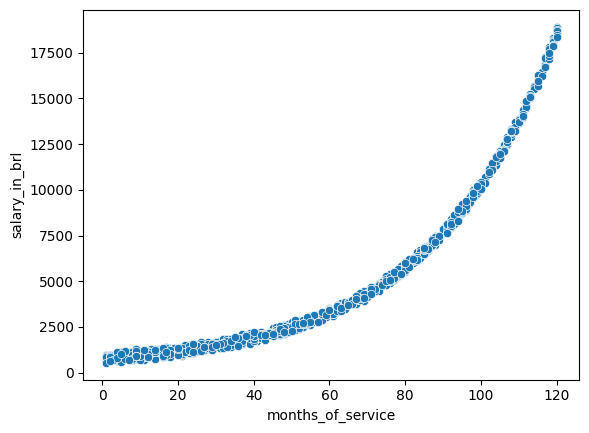

In [19]:
# Correlate numerical variables with the target variable
sns.scatterplot(data=df_salary_eda, x='months_of_service', y='salary_in_brl')

<Axes: xlabel='seniority', ylabel='salary_in_brl'>

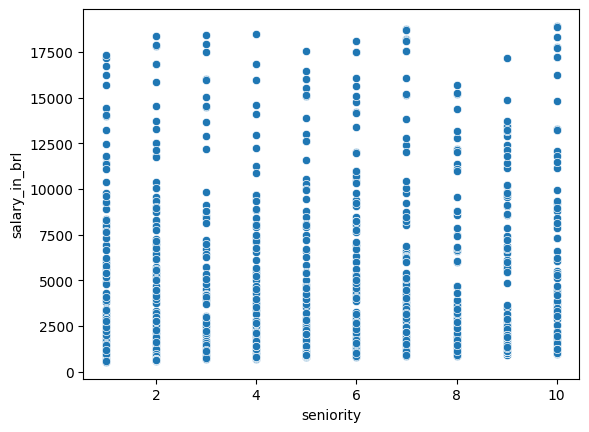

In [20]:
sns.scatterplot(data=df_salary_eda, x='seniority', y='salary_in_brl')

<Axes: xlabel='months_of_service', ylabel='seniority'>

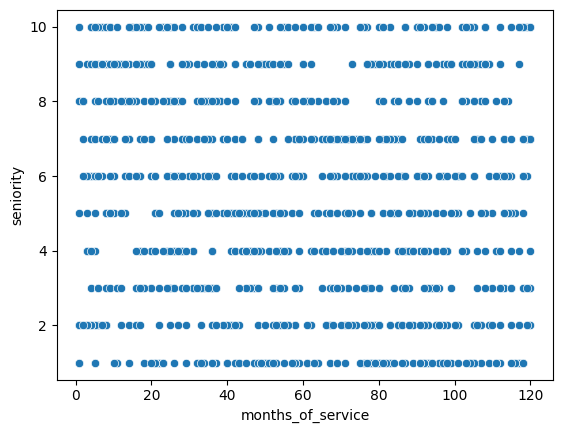

In [21]:
sns.scatterplot(data=df_salary_eda, x='months_of_service', y='seniority')

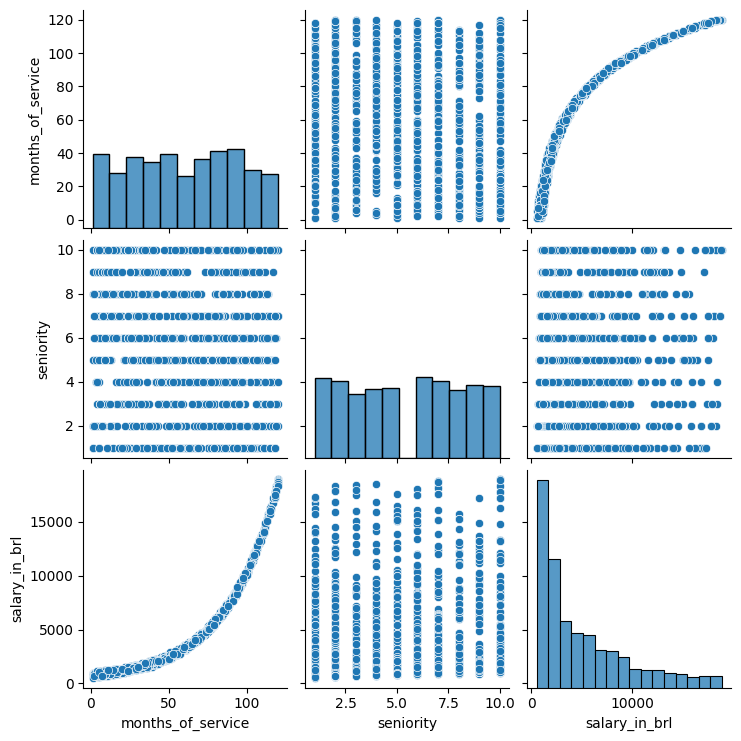

In [22]:
# Histograms of the variables
sns.pairplot(df_salary_eda)

<Axes: >

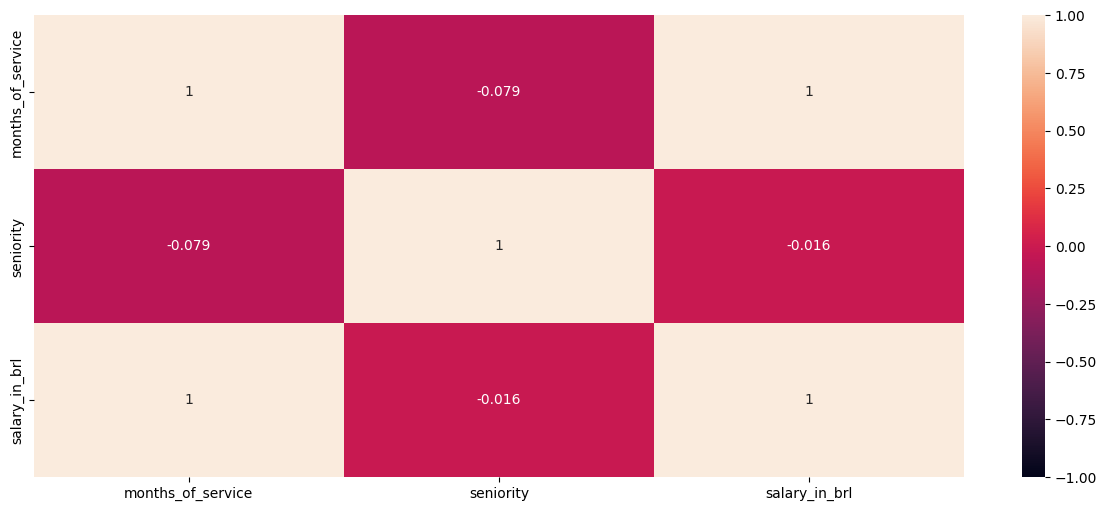

In [23]:
# Heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df_salary_eda.corr('spearman'), annot=True, vmin=-1, vmax=1)


<Axes: >

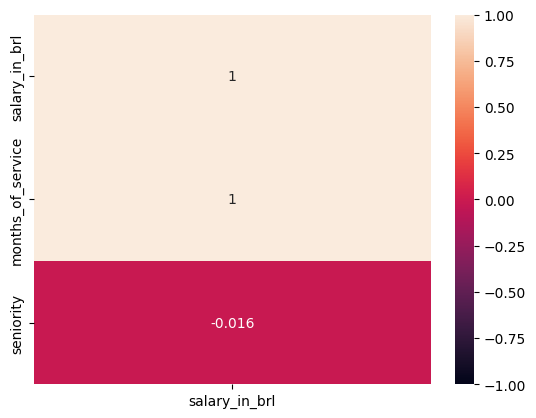

In [24]:
# Ranking
sns.heatmap(df_salary_eda.corr('spearman')[['salary_in_brl']].sort_values(by='salary_in_brl', ascending=False), annot=True, vmin=-1, vmax=1)

In [25]:
# Bucketing - Months of Service
bins_months_of_service = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
labels_months_of_service = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129']
df_salary_bucketing['time_scale'] = pd.cut(x=df_salary_bucketing['months_of_service'], bins=bins_months_of_service, labels=labels_months_of_service, include_lowest=True)

<Axes: xlabel='time_scale', ylabel='salary_in_brl'>

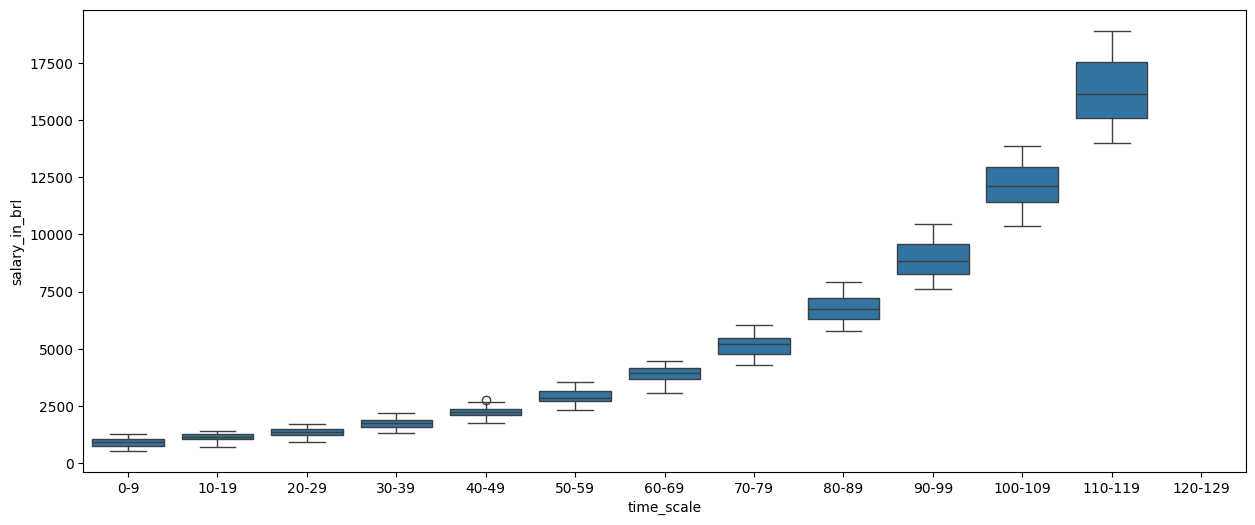

In [26]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_salary_bucketing, x='time_scale', y='salary_in_brl')

### Linear Model - Training

In [27]:
# Import the libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

In [28]:
# Create the Train and Test datasets
X = df_salary.drop(columns='salary_in_brl', axis=1)
y = df_salary['salary_in_brl']

In [29]:
# Split the dataset
kf = KFold(n_splits=5, shuffle=True, random_state=51)